# Part1_peijin

In [1]:
import sys
import pandas as pd
import numpy as np
from plotnine import*
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # Ignore warnings
import os
import matplotlib.pyplot as plt

In [2]:
##Part1:Current COVID Data
##Q1(A)
us_states=pd.read_csv("us_states.csv") ##read the us_states.csv file as a Pandas DataFrame
us_states.head(4)##Print the first 5 rows in the dataset 

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0


In [3]:
##print the shape of the dataset
us_states.shape

(11564, 5)

In [4]:
##Q1(B)
us_states.sort_values('date',ascending=False).head(3)## find the most recent date in the data

,date,state,fips,cases,deaths
11563,2020-09-28,Wyoming,56,5754,50
11536,2020-09-28,Montana,30,12538,174
11534,2020-09-28,Mississippi,28,97049,2921


In [5]:
##Create a new object called sept_covid which contains only observations corresponding to the most recent date in the data.
sept_covid=us_states.loc[us_states.date == "2020-09-28"]
sept_covid.head(4)##check out the data

,date,state,fips,cases,deaths
11509,2020-09-28,Alabama,1,152983,2501
11510,2020-09-28,Alaska,2,8477,52
11511,2020-09-28,Arizona,4,217513,5624
11512,2020-09-28,Arkansas,5,82049,1329


In [6]:
##Q2(A)
##read in the files
election_results=pd.read_csv("2016_election_results.csv")
mask_requirement=pd.read_csv("mask_requirement.csv")
state_ACS_data=pd.read_csv("state_ACS_data.csv")
stay_order=pd.read_csv("stay_order.csv.")

In [7]:
##sovle the typo pronblem: change Kntucky with Kentucky
election_results["state"]=election_results["state"].replace('Kntucky', "Kentucky")
election_results.head(4)##check out the data

,state,trump_2016_vote_share,trump_won
0,Alabama,62.10%,Yes
1,Alaska,51.30%,Yes
2,Arizona,48.10%,Yes
3,Arkansas,60.60%,Yes


In [8]:
##sovle the typo pronblem: change Washington, D.C. with Washington
mask_requirement["state"]=mask_requirement["state"].replace('Washington, D.C.', "District of Columbia")
mask_requirement.head(4)##check out the data

,state,mask_requirement_detail,maskreq_effective_date
0,Alabama,Entire State,7/16/20
1,Alaska,Parts of State,NaN
2,Arizona,Parts of State (Employees Only),NaN
3,Arkansas,Entire State,7/20/20


In [9]:
state_ACS_data.head(4)##check out the data

,state,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance
0,Alabama,1,4864680,65.713058,17.489743,48486,9.978475
1,Alaska,2,738516,61.035103,10.804469,76715,14.417467
2,Arizona,4,6946685,55.074989,16.087707,56213,10.942914
3,Arkansas,5,2990671,72.687668,17.579624,45726,9.037174


In [10]:
##solve the typo pronblem: change WestVirginia with West Virginia
stay_order["state"]=stay_order["state"].replace('WestVirginia', "West Virginia")
stay_order.head(4)##check out the data

,state,effective,enforcement
0,Alabama,4/4/2020 - 4/30/2020,No
1,Alaska,3/28/2020 - 4/24/2020,Yes
2,Arizona,3/31/2020 - 5/15/2020,Yes
3,Arkansas,NaN,NaN


In [11]:
## Merge all of these data files together
ele_mask=election_results.merge(mask_requirement,how="outer",on="state")
ele_mask_ACS=ele_mask.merge(state_ACS_data,how="outer",on="state")
ele_mask_ACS_stay=ele_mask_ACS.merge(stay_order,how="outer",on="state")
##then merge this object with sept_covid
all_merge=ele_mask_ACS_stay.merge(sept_covid,how="outer",on="state")
all_merge.head(4)

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,effective,enforcement,date,fips,cases,deaths
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,4/4/2020 - 4/30/2020,No,2020-09-28,1,152983,2501
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,14.417467,3/28/2020 - 4/24/2020,Yes,2020-09-28,2,8477,52
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,10.942914,3/31/2020 - 5/15/2020,Yes,2020-09-28,4,217513,5624
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,9.037174,NaN,NaN,2020-09-28,5,82049,1329


In [12]:
##Q2(B)
##By visually assessing, here are missing/null values in your data
all_merge=all_merge.dropna(subset = ["trump_2016_vote_share","trump_won","mask_requirement_detail","State_FIPS","State_Population","Pct_White_Non_Hispanic","Pct_Population_in_Poverty","Median_Household_Income","Pct_Population_No_Health_Insurance","date","fips","cases","deaths"])
##Drop all observations containing null values for any of the columns except for the maskreq_effective_date, effective, and enforcement columns
all_merge.head(4)##checkt the data out

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,effective,enforcement,date,fips,cases,deaths
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,4/4/2020 - 4/30/2020,No,2020-09-28,1,152983,2501
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,14.417467,3/28/2020 - 4/24/2020,Yes,2020-09-28,2,8477,52
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,10.942914,3/31/2020 - 5/15/2020,Yes,2020-09-28,4,217513,5624
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,9.037174,NaN,NaN,2020-09-28,5,82049,1329


In [13]:
##Q3(A)
#create the variables: the total number of cases per 100,000 population (as of September 28)
all_merge = all_merge.assign(total_cases_per100k = all_merge["cases"]/all_merge["State_Population"]*100000)
all_merge.head(4)

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,effective,enforcement,date,fips,cases,deaths,total_cases_per100k
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,4/4/2020 - 4/30/2020,No,2020-09-28,1,152983,2501,3144.770057
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,14.417467,3/28/2020 - 4/24/2020,Yes,2020-09-28,2,8477,52,1147.842430
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,10.942914,3/31/2020 - 5/15/2020,Yes,2020-09-28,4,217513,5624,3131.176957
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,9.037174,NaN,NaN,2020-09-28,5,82049,1329,2743.498031


In [14]:
#create the variables: the total number of deaths per 100,000 population (as of September 28)
all_merge = all_merge.assign(total_deaths_per100k = all_merge["deaths"]/all_merge["State_Population"]*100000)
all_merge.head(4)

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,effective,enforcement,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,4/4/2020 - 4/30/2020,No,2020-09-28,1,152983,2501,3144.770057,51.411398
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,14.417467,3/28/2020 - 4/24/2020,Yes,2020-09-28,2,8477,52,1147.842430,7.041147
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,10.942914,3/31/2020 - 5/15/2020,Yes,2020-09-28,4,217513,5624,3131.176957,80.959479
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,9.037174,NaN,NaN,2020-09-28,5,82049,1329,2743.498031,44.438188


In [15]:
#create the variables: takes on the value of 1 if a state has a statewide (or territory-wide) mask mandate, otherwise
see_diff_typies=pd.get_dummies(all_merge["mask_requirement_detail"])##form dummy variables by using "get_dummies"
see_diff_typies["m_mandate"]=see_diff_typies["Entire State"]+see_diff_typies["Entire Territory"]##form dummy variables of "m_mandate", which is the sum of "Entire State" and "Entire Territory" 
m_mandate=see_diff_typies.iloc[:,8:]## select the column of "m_mandate" only 
m_mandate.head(4)## look into "m_mandate" 

,m_mandate
0,1
1,0
2,0
3,1


In [16]:
##add "m_mandate"  to df
all_merge=pd.concat([all_merge,m_mandate],axis=1)
all_merge.head(4)

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,effective,enforcement,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,4/4/2020 - 4/30/2020,No,2020-09-28,1,152983,2501,3144.770057,51.411398,1
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,14.417467,3/28/2020 - 4/24/2020,Yes,2020-09-28,2,8477,52,1147.842430,7.041147,0
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,10.942914,3/31/2020 - 5/15/2020,Yes,2020-09-28,4,217513,5624,3131.176957,80.959479,0
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,9.037174,NaN,NaN,2020-09-28,5,82049,1329,2743.498031,44.438188,1


In [17]:
#create the variables: equal to the number of days for which stay at home orders were in effect
all_merge["a"],all_merge["b"]=all_merge["effective"].str.split("-",1).str##split the the column of effective into two
all_merge.head(4)

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,enforcement,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,a,b
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,No,2020-09-28,1,152983,2501,3144.770057,51.411398,1,4/4/2020,4/30/2020
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,...,Yes,2020-09-28,2,8477,52,1147.842430,7.041147,0,3/28/2020,4/24/2020
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,...,Yes,2020-09-28,4,217513,5624,3131.176957,80.959479,0,3/31/2020,5/15/2020
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,...,NaN,2020-09-28,5,82049,1329,2743.498031,44.438188,1,NaN,NaN


In [18]:
all_merge['a'].unique()##check the variables in "a" 

array(['4/4/2020 ', '3/28/2020 ', '3/31/2020 ', nan, '3/19/2020 ',
       '3/26/2020 ', '3/23/2020 ', '3/24/2020 ', '4/1/2020 ', '4/3/2020 ',
       '3/25/2020 ', '3/30/2020 ', '3/6/2020 ', '3/22/2020 ', '4/2/2020 ',
       '3/5/2020 ', '3/27/2020 ', '4/6/2020 ', '3/29/2020 ', '3/21/2020 '],
      dtype=object)

In [19]:
all_merge['b'].unique()##check the variables in "b" , need to change  "Until lifted" into "9/28/2020"

array([' 4/30/2020', ' 4/24/2020', ' 5/15/2020', nan, ' Until lifted',
       ' 4/26/2020', ' 5/20/2020', ' 5/31/2020', ' 5/1/2020', ' 5/3/2020',
       ' 5/18/2020', ' 5/28/2020', ' 5/17/2020', ' 5/11/2020',
       ' 5/9/2020', ' 6/15/2020', ' 6/9/2020', ' 5/22/2020', ' 5/29/2020',
       ' 5/6/2020', ' 6/4/2020', ' 5/8/2020', ' 5/4/2020', ' 6/10/2020',
       ' 5/13/2020'], dtype=object)

In [20]:
all_merge_1=all_merge.copy()##since string is unmutable, a new df is needed 
all_merge_1["b"]=all_merge["b"].str.replace("Until lifted", "9/28/2020")##replace "Until lifted" with "9/28/2020"
all_merge_1.head(4)##look into the data

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,enforcement,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,a,b
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,No,2020-09-28,1,152983,2501,3144.770057,51.411398,1,4/4/2020,4/30/2020
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,...,Yes,2020-09-28,2,8477,52,1147.842430,7.041147,0,3/28/2020,4/24/2020
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,...,Yes,2020-09-28,4,217513,5624,3131.176957,80.959479,0,3/31/2020,5/15/2020
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,...,NaN,2020-09-28,5,82049,1329,2743.498031,44.438188,1,NaN,NaN


In [21]:
all_merge_1["a"]=pd.to_datetime(all_merge_1.a)## transfer the data in "a" into a datetime formate 
all_merge_1["b"]=pd.to_datetime(all_merge_1.b)## transfer the data in "b" into a datetime formate 
all_merge_1.head(4)##look into the data

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,enforcement,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,a,b
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,No,2020-09-28,1,152983,2501,3144.770057,51.411398,1,2020-04-04,2020-04-30
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,...,Yes,2020-09-28,2,8477,52,1147.842430,7.041147,0,2020-03-28,2020-04-24
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,...,Yes,2020-09-28,4,217513,5624,3131.176957,80.959479,0,2020-03-31,2020-05-15
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,...,NaN,2020-09-28,5,82049,1329,2743.498031,44.438188,1,NaT,NaT


In [22]:
all_merge_1["n_days_1"]=all_merge_1["b"]-all_merge_1["a"]##calculate the days in between
all_merge_1.head(4)##look into the data

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,a,b,n_days_1
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,2020-09-28,1,152983,2501,3144.770057,51.411398,1,2020-04-04,2020-04-30,26 days
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,...,2020-09-28,2,8477,52,1147.842430,7.041147,0,2020-03-28,2020-04-24,27 days
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,...,2020-09-28,4,217513,5624,3131.176957,80.959479,0,2020-03-31,2020-05-15,45 days
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,...,2020-09-28,5,82049,1329,2743.498031,44.438188,1,NaT,NaT,NaT


In [23]:
all_merge_1.n_days_1.fillna(pd.Timedelta(seconds=0),inplace=True)##Convert the missing value of the time data to 0
all_merge_1.head(4)

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,a,b,n_days_1
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,2020-09-28,1,152983,2501,3144.770057,51.411398,1,2020-04-04,2020-04-30,26 days
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,...,2020-09-28,2,8477,52,1147.842430,7.041147,0,2020-03-28,2020-04-24,27 days
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,...,2020-09-28,4,217513,5624,3131.176957,80.959479,0,2020-03-31,2020-05-15,45 days
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,...,2020-09-28,5,82049,1329,2743.498031,44.438188,1,NaT,NaT,0 days


In [24]:
all_merge_2=all_merge_1.copy()##since string is unmutable, a new df is needed 

In [25]:
all_merge_2["n_days_1"]=all_merge_1.n_days_1.astype("str").apply(lambda x:x[:-5]).astype("int32")##turn the data into int
all_merge_2.head(4)##look into "all_merge_2"

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,a,b,n_days_1
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,2020-09-28,1,152983,2501,3144.770057,51.411398,1,2020-04-04,2020-04-30,26
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,...,2020-09-28,2,8477,52,1147.842430,7.041147,0,2020-03-28,2020-04-24,27
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,...,2020-09-28,4,217513,5624,3131.176957,80.959479,0,2020-03-31,2020-05-15,45
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,...,2020-09-28,5,82049,1329,2743.498031,44.438188,1,NaT,NaT,0


In [26]:
all_merge_2["n_days"]=all_merge_2["n_days_1"]+1##add 1 for state had the order
all_merge_3=all_merge_2
all_merge_3["n_days"]=all_merge_2["n_days"].replace(1,0)##for those states do not have order, drop the 1 day record
all_merge_3.head(4)##check out the data

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,a,b,n_days_1,n_days
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,1,152983,2501,3144.770057,51.411398,1,2020-04-04,2020-04-30,26,27
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,...,2,8477,52,1147.842430,7.041147,0,2020-03-28,2020-04-24,27,28
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,...,4,217513,5624,3131.176957,80.959479,0,2020-03-31,2020-05-15,45,46
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,...,5,82049,1329,2743.498031,44.438188,1,NaT,NaT,0,0


In [27]:
all_merge_3=all_merge_3.drop(columns=["a","b","n_days_1"])##drop colums of "a" and "b"
all_merge_3.head(4)

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,effective,enforcement,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,n_days
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,4/4/2020 - 4/30/2020,No,2020-09-28,1,152983,2501,3144.770057,51.411398,1,27
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,...,3/28/2020 - 4/24/2020,Yes,2020-09-28,2,8477,52,1147.842430,7.041147,0,28
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,...,3/31/2020 - 5/15/2020,Yes,2020-09-28,4,217513,5624,3131.176957,80.959479,0,46
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,...,NaN,NaN,2020-09-28,5,82049,1329,2743.498031,44.438188,1,0


In [28]:
# Export "all_merge_2" as csv without index 
all_merge_3.to_csv("all_merge_3.csv",index=False)

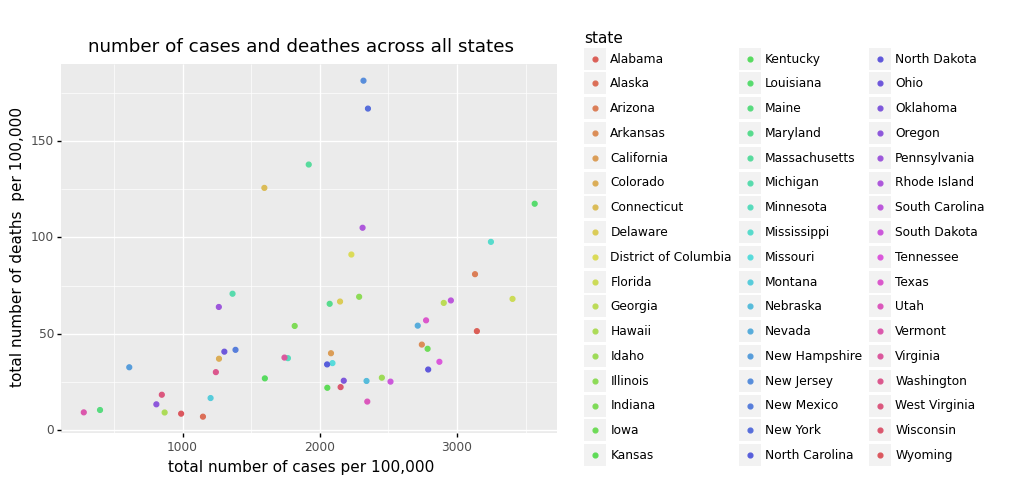

<ggplot: (119040976872)>

In [29]:
##Q3(B) Visualize the total number of cases and deaths per 100,000 population across all states. 
(ggplot(all_merge, aes(x='total_cases_per100k',y = 'total_deaths_per100k',color="state")) +
 geom_point()+
 labs(x = "total number of cases per 100,000",y="total number of deaths  per 100,000",title="number of cases and deathes across all states"))

In [30]:
##Q3(C) Display the average length of stay at home orders and the median length (including states that didn’t implement any order). Additionally, find the state(s) that had the shortest stay-at-home orders among states that did implement an order.
##Display the average length of stay at home orders 
all_merge_2.n_days.mean()

52.90196078431372

In [31]:
##Display the median length (including states that didn’t implement any order)
all_merge_2.n_days.median()

45.0

In [32]:
## the state(s) that had the shortest stay-at-home orders among states that did implement an order
all_merge_3=all_merge_2.filter(["state","n_days"])## create a new df holding columns of "state" and "n_days" only
all_merge_3.sort_values("n_days",ascending=True).head(10)## Arrange the duration in descending order
##so the state of Alabama had the shortest stay-at-home orders of 27 days.

,state,n_days
50,Wyoming,0
41,South Dakota,0
34,North Dakota,0
3,Arkansas,0
27,Nebraska,0
15,Iowa,0
0,Alabama,27
25,Missouri,28
9,Florida,28
10,Georgia,28


In [33]:
##Q4(A) Compare the correlations of cases and deaths per 100,000 residents with the demographic variables contained in the state_ACS_data.csv file as well as the percentage of votes for Donald Trump. Briefly comment on any patterns you notice
all_merge_corr=all_merge_2.filter(["total_cases_per100k","total_deaths_per100k","State_Population","Pct_White_Non_Hispanic","Pct_Population_in_Poverty","Median_Household_Income","Pct_Population_No_Health_Insurance","trump_2016_vote_share"])##form a new df holding the needed variables 
all_merge_corr.head(4)##look into the data

,total_cases_per100k,total_deaths_per100k,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,trump_2016_vote_share
0,3144.770057,51.411398,4864680.0,65.713058,17.489743,48486.0,9.978475,62.10%
1,1147.842430,7.041147,738516.0,61.035103,10.804469,76715.0,14.417467,51.30%
2,3131.176957,80.959479,6946685.0,55.074989,16.087707,56213.0,10.942914,48.10%
3,2743.498031,44.438188,2990671.0,72.687668,17.579624,45726.0,9.037174,60.60%


In [34]:
all_merge_corr.dtypes##check the data type of "all_merge_corr"

total_cases_per100k                   float64
total_deaths_per100k                  float64
State_Population                      float64
Pct_White_Non_Hispanic                float64
Pct_Population_in_Poverty             float64
Median_Household_Income               float64
Pct_Population_No_Health_Insurance    float64
trump_2016_vote_share                  object
dtype: object

In [35]:
all_merge_corr.trump_2016_vote_share.astype(str).str[:]##transfer the data type into string

0     62.10%
1     51.30%
2     48.10%
3     60.60%
4     31.50%
5     43.30%
6     40.90%
7     41.70%
8      4.10%
9     48.60%
10    50.40%
11    30.00%
12    59.20%
13    38.40%
14    56.50%
15    51.10%
16    56.20%
17    62.50%
18    58.10%
19    44.90%
20    33.90%
21    32.80%
22    47.30%
23    44.90%
24    57.90%
25    56.40%
26    55.60%
27    58.70%
28    45.50%
29    46.50%
30    41.00%
31    40.00%
32    36.50%
33    49.80%
34    63.00%
35    51.30%
36    65.30%
37    39.10%
38    48.20%
39    38.90%
40    54.90%
41    61.50%
42    60.70%
43    52.20%
44    45.10%
45    30.30%
46    44.40%
47    36.80%
48    67.90%
49    47.20%
50    68.20%
Name: trump_2016_vote_share, dtype: object

In [36]:
all_merge_corr["trump_2016_vote_share"]=all_merge_corr["trump_2016_vote_share"].str.strip("%").astype(float)/100##transfer the data type into float

In [37]:
all_merge_corr.dtypes##check out the data type 

total_cases_per100k                   float64
total_deaths_per100k                  float64
State_Population                      float64
Pct_White_Non_Hispanic                float64
Pct_Population_in_Poverty             float64
Median_Household_Income               float64
Pct_Population_No_Health_Insurance    float64
trump_2016_vote_share                 float64
dtype: object

In [38]:
all_merge_corr.head(4)##look into the data

,total_cases_per100k,total_deaths_per100k,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,trump_2016_vote_share
0,3144.770057,51.411398,4864680.0,65.713058,17.489743,48486.0,9.978475,0.621
1,1147.842430,7.041147,738516.0,61.035103,10.804469,76715.0,14.417467,0.513
2,3131.176957,80.959479,6946685.0,55.074989,16.087707,56213.0,10.942914,0.481
3,2743.498031,44.438188,2990671.0,72.687668,17.579624,45726.0,9.037174,0.606


In [39]:
all_merge_corr.corr() ## Compare the correlations between variables
##Briefly comment:
##The population of states is positively correlated with the total cases per 100k and total deaths per 100k, the more population, the more cases and deaths.  Trump's 2016 vote share is negatively correlated with the total cases per 100k and total deaths per 100k, the more deaths and cases, the lower the vote share. What's more, the total deaths per 100k correlates more with vote share than the  total cases per 100k.

,total_cases_per100k,total_deaths_per100k,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,trump_2016_vote_share
total_cases_per100k,1.000000,0.416641,0.219370,-0.324677,0.421706,-0.280141,0.417619,0.235718
total_deaths_per100k,0.416641,1.000000,0.247892,-0.356649,0.124127,0.231816,-0.133517,-0.311191
State_Population,0.219370,0.247892,1.000000,-0.408899,0.122588,0.066323,0.217165,-0.178531
Pct_White_Non_Hispanic,-0.324677,-0.356649,-0.408899,1.000000,-0.234247,-0.296291,-0.242584,0.485463
Pct_Population_in_Poverty,0.421706,0.124127,0.122588,-0.234247,1.000000,-0.745421,0.393737,0.287934
Median_Household_Income,-0.280141,0.231816,0.066323,-0.296291,-0.745421,1.000000,-0.412453,-0.696187
Pct_Population_No_Health_Insurance,0.417619,-0.133517,0.217165,-0.242584,0.393737,-0.412453,1.000000,0.493655
trump_2016_vote_share,0.235718,-0.311191,-0.178531,0.485463,0.287934,-0.696187,0.493655,1.000000


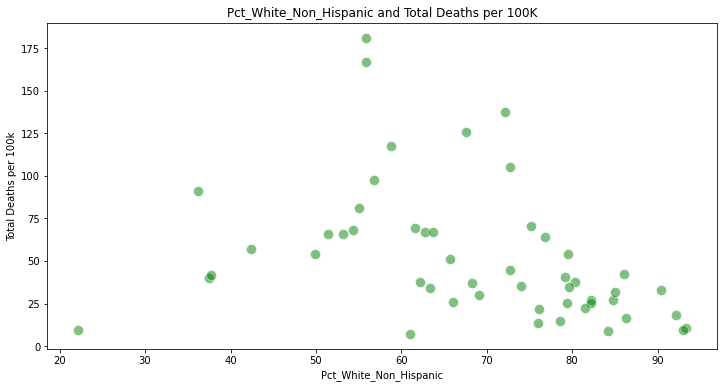

In [40]:
##Q4(B) For the demographic variable that is most strongly correlated with deaths per 100,000 residents, create a scatterplot of this variable on the x-axis, against deaths per 100,000 on the y-axis. 
## "Pct_White_Non_Hispanic" is the variable that is most strongly correlated with deaths per 100,000 residents
### using Seaborn to draw the pic 
plt.figure(figsize=(12,6))
sns.scatterplot(x = "Pct_White_Non_Hispanic",y="total_deaths_per100k",
                alpha=.5,color="green",s=100,
                data = all_merge_corr)
plt.xlabel("Pct_White_Non_Hispanic")
plt.ylabel("Total Deaths per 100k")
plt.title("Pct_White_Non_Hispanic and Total Deaths per 100K")
plt.show()